from pathlib import Path
#from itertools import combinations
import re
import numpy as np
import pandas as pd
#from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import NegativeClassOptimization.config as config
import yaml
import os
import glob

In [102]:
import re
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import NegativeClassOptimization.config as config
import glob
from pathlib import Path
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, log_loss

In [114]:
def calc_metric(res_root_folder):
    res_folders = glob.glob(str(Path(config.IMMUNE_ML_BASE_PATH / f'{res_root_folder}/[0-9A-Z]*_excl[0-9A-Z]*_negds_[0-9A-Z]*_instruction')))
    res_list = []
    for folder in  res_folders:
        ag1, ag_excl, ag2 = re.search('([0-9A-Z]*)_excl([0-9A-Z]*)_negds_([0-9A-Z]*)_instruction',folder).groups()
        df_pred = pd.read_csv(folder+'/predictions.csv')
        antigen = df_pred['example_id'].apply(lambda x: re.search('([0-9A-Z]*)_', x).group(1))
        y_true = (antigen == ag1)
        y_pred =  df_pred['binder']
        #y_score = df_pred['binder_True_proba']
        accuracy = accuracy_score(y_true, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        f1_micro = f1_score(y_true, y_pred,  average='micro')
        f1_macro = f1_score(y_true, y_pred,  average='macro')
        f1_weighted = f1_score(y_true, y_pred,  average='weighted')
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        log_loss_calc = log_loss(y_true, y_pred)
        res_list.append([ag1, ag_excl, ag2, accuracy,  balanced_accuracy, auc, f1_micro, f1_macro, f1_weighted, precision, recall, log_loss_calc])
        #print('one folder finished')
    df_metrics = pd.DataFrame(res_list, columns = ['pos_ag', 'trained_neg_ag', 'tested_neg_ag', 'accuracy',  'balanced_accuracy', 'auc', 'f1_micro',\
                                                      'f1_macro', 'f1_weighted', 'precision', 'recall', 'log_loss'])
    return df_metrics
        
        

In [115]:
res_root_folder = 'cross_test_rf_out'
rf_cross_test_metrics = calc_metric(res_root_folder)

In [116]:
res_root_folder = 'cross_test_svm_out'
svm_cross_test_metrics = calc_metric(res_root_folder)

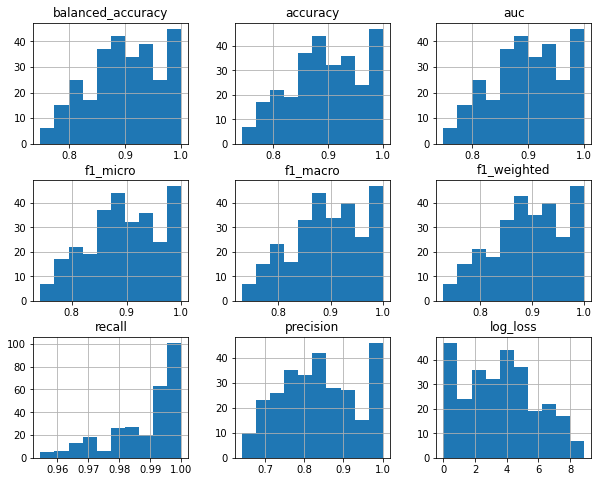

In [117]:
rf_cross_test_metrics.hist(['balanced_accuracy',  'accuracy', 'auc', 'f1_micro', 'f1_macro', 'f1_weighted', 'recall', 'precision', 'log_loss'], figsize=(10, 8));

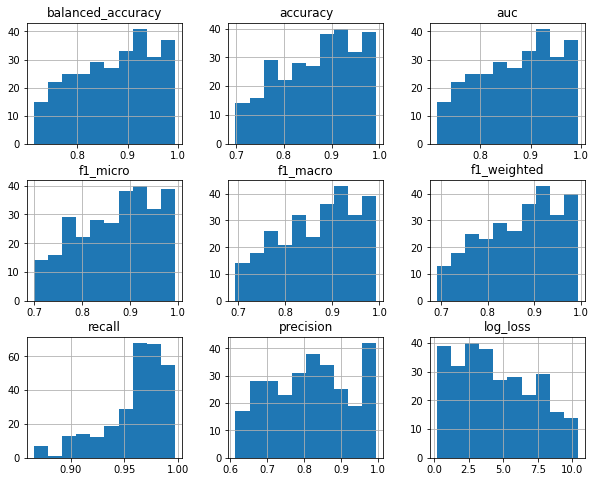

In [119]:
svm_cross_test_metrics.hist(['balanced_accuracy',  'accuracy', 'auc', 'f1_micro', 'f1_macro', 'f1_weighted', 'recall', 'precision', 'log_loss'], figsize=(10, 8));